# Clustering Antarctic Penguin Species

The data is available in csv-Format as penguins.csv, which was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The dataset consists of 5 columns.

culmen_length_mm: culmen length (mm)

culmen_depth_mm: culmen depth (mm)

flipper_length_mm: flipper length (mm)

body_mass_g:body mass (g)

sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are at least three species that are native to the region: Adelie, Chinstrap, and Gentoo. The task is to a identify groups in the dataset.

In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("datasets/penguins.csv")
print(penguins_df.head())
print('\n')
print(penguins_df.info())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


The column with the penguin sex needs to be changed using the dummy variables, and that column can be removed from the dataset to be used. Afterward, the data will be transformed by a scaler to be used.

In [2]:
 # Preprocessing the data
    # Getting the dummies for the column 'sex'

penguins = penguins_df
dummies = pd.get_dummies(penguins_df['sex'], dtype='int')
penguins.drop(columns='sex', axis=1, inplace=True)
penguins_d = pd.concat([penguins, dummies], axis=1)

    # Standardizing/scalling the data

scaler = StandardScaler()

X = scaler.fit_transform(penguins_d)
penguins_prepro = pd.DataFrame(data=X, columns=penguins_d.columns)

D:\Programas\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Programas\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Programas\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Programas\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

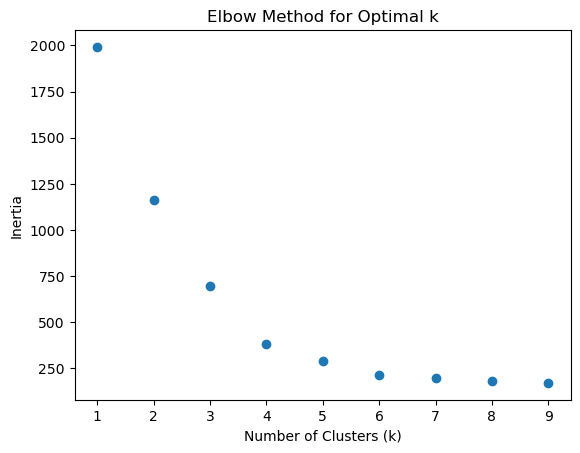

In [5]:
# K-Means
    # Elbow method:

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_prepro)
    inertia.append(kmeans.inertia_)   
    
plt.scatter(range(1,10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [4]:
# KMeans clustering:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_prepro)
penguins_d['label'] = kmeans.labels_

plt.scatter(penguins_d['label'], penguins_d['culmen_depth_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Culmen Length (mm)')
plt.xticks(range(int(penguins_d['label'].min()), int(penguins_d['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')

plt.show()

NameError: name 'penguins_stand' is not defined

In [ ]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

stat_penguins = penguins_d.groupby('label')[numeric_columns].mean()
stat_penguins